In [103]:
URL = "https://www.youtube.com/watch?v=Sq9DmUBdQMs"

In [104]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time
import random

In [105]:
# 웹드라이버 설정
browser = webdriver.Chrome()
browser.get(URL)  # 유튜브 비디오 URL 입력

time.sleep(2)  # 페이지 로딩 대기

# 댓글 섹션까지 스크롤
browser.find_element(By.TAG_NAME, 'body').send_keys(Keys.PAGE_DOWN)
time.sleep(6)  # 동적 로딩 대기

In [111]:
# 스크롤 다운하여 모든 댓글 로드
last_height = browser.execute_script("return document.documentElement.scrollHeight")
while True:
    browser.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(random.uniform(1.5, 3.0))  # 로딩과 다양성을 위해 랜덤 대기 시간 적용
    new_height = browser.execute_script("return document.documentElement.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [107]:
# # 댓글 요소 수집
# comments = browser.find_elements(By.XPATH, '//*[@id="content-text"]')
# usernames = browser.find_elements(By.XPATH, '//*[@id="author-text"]')
# likes = browser.find_elements(By.XPATH, '//*[contains(@id, "vote-count-middle")]')
# #dates = browser.find_elements(By.XPATH, '//*[@id="header-author"]//yt-formatted-string/a')
# #reply_counts = browser.find_elements(By.XPATH, '//ytd-comment-thread-renderer//span[@id="vote-count-middle"]/following-sibling::span')

# # DataFrame 생성
# data = {
#     # '작성일': [date.text for date in dates],
#     '사용자이름': [username.text for username in usernames],
#     'comment': [comment.text for comment in comments],
#     '좋아요수': [like.text if like.text != '' else '0' for like in likes],
#     # '답글수': [reply.text.split()[0] if reply.text != '' else '0' for reply in reply_counts]
# }
# df = pd.DataFrame(data)

# # DataFrame 확인
# print(df)


Empty DataFrame
Columns: [사용자이름, comment, 좋아요수]
Index: []


In [119]:

# 댓글 요소 수집
comments = browser.find_elements(By.XPATH, '//*[@id="content-text"]')
usernames = browser.find_elements(By.XPATH, '//*[@id="author-text"]')
n_likes = browser.find_elements(By.XPATH, '//*[contains(@id, "vote-count-middle")]')
author_elements = browser.find_elements(By.CSS_SELECTOR, "#author-text .yt-simple-endpoint.style-scope.ytd-comment-view-model")
time_elements = browser.find_elements(By.CSS_SELECTOR, "#published-time-text .yt-simple-endpoint.style-scope.ytd-comment-view-model")
# reply_count_elements = browser.find_elements(By.XPATH, '//*[@id="more-replies"]/yt-button-shape/button/div[2]/span')

# reply_counts = []
# for comment in reply_count_elements:
#     try:
#         reply_count = comment.find_element(By.XPATH, './/*[@id="more-replies"]/yt-button-shape/button/div[2]/span').text.strip()
#     except:
#         reply_count = "-1"
#     reply_counts.append(reply_count)

# DataFrame 생성
data = {
    'usernames': [username.text for username in usernames],
    'n_likes': [like.text if like.text != '' else '0' for like in n_likes],
    'times' : [element.text.strip() for element in time_elements],
    'comment': [comment.text for comment in comments],
    # 'reply_counts' : [element.text.strip() for element in reply_count_elements]
}

df = pd.DataFrame(data)
df['comment'] = df['comment'].str.replace('[^가-힣]', ' ', regex = True) # 댓글 전처리
df['comment']

# DataFrame 확인
print(df)

             usernames n_likes      times  \
0                         1.2만       4년 전   
1     @user-kf8dh7ii8i    3.7천       4년 전   
2     @user-pc9uz5gf2s      3천       4년 전   
3      @HOODSTAR-cs2wn     985       4년 전   
4            @tv-yh6id    2.3천  4년 전(수정됨)   
...                ...     ...        ...   
1023        @TheGhke12       0       4년 전   
1024  @user-bm6tl9yx4p       0       3년 전   
1025          @jhl7823       1       3년 전   
1026       @steelo1205       0       4년 전   
1027  @user-sf8xv6vc9b       0       2년 전   

                                               comment  
0                                        와 개좋네          
1               노엘이 차타면서 뮤비 출연했으면 역대급인데   내 속도는    키로   
2     랩이면 랩 노래면 노래 악기면 악기 유머면 유머 투블럭이 잘어울리는 남자      창모  
3                             영비  다 때려 노엘  박어 한요한  범퍼카  
4                                             요한이형 사랑해  
...                                                ...  
1023           키드밀리 패션 처음 봤을땐 아줌마 같았는데 보면 볼수록 할머니같다     
102

In [118]:
len(comments)
len(usernames)
len(n_likes)
len(usernames)
len(time_elements)
# len(reply_counts)

10

In [120]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

# plt 한국어폰트설정맥북환경 애플고딕
rc('font', family='AppleGothic')

In [121]:
# pip install soynlp

In [122]:
from soynlp.noun import LRNounExtractor_v2
import pandas as pd

# 모든 댓글을 하나의 문자열로 결합
comments_string = df['comment'].str.cat(sep=' ')

# soynlp 명사 추출기 인스턴스 생성
noun_extractor = LRNounExtractor_v2()
nouns = noun_extractor.train_extract([comments_string])  # 배열 형태로 입력

# 추출된 명사를 다시 하나의 문자열로 결합
nouns_string = ' '.join(nouns.keys())  # 추출된 명사들의 key만 사용

# 결과 출력
nouns_string

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 3136 from 1 sents. mem=0.073 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=7432, mem=0.075 Gb
[Noun Extractor] batch prediction was completed for 1023 words
[Noun Extractor] checked compounds. discovered 24 compounds
[Noun Extractor] postprocessing detaching_features : 330 -> 329
[Noun Extractor] postprocessing ignore_features : 329 -> 314
[Noun Extractor] postprocessing ignore_NJ : 314 -> 314
[Noun Extractor] 314 nouns (24 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.078 Gb                    
[Noun Extractor] 38.54 % eojeols are covered


'람보르기니 파라노이드 패러노이드 이슬라이브 키드밀리형 소년만화 오랑우탄 잘생겨보 키드밀리 어림잡아 아티스트 과학수업 대한민국 한요한이 기리보이 릴쿠기형 한요한님 기분탓 동물원 한요한 장용준 최강자 썸네일 마지막 훅부분 피쳐링 순식간 유튜브 듣는중 아줌마 뒤돌지 조회수 목소리 이노래 원숭이 포르쉐 김민규 보자기 범퍼카 멜로디 이영상 스카프 개간지 신청곡 오토튠 노엘이 사람들 블랙넛 오른쪽 드라마 할머니 주제가 좋아요 개띵곡 이런곡 않는것 오른손 가능성 부가티 라이브 달리고 인생곡 피카온 달고나 동현이 듣고 성공 요즘 감격 노래 가능 노엘 텐션 오빠 사람 느낌 여성 그때 기타 요한 지금 궁금 커버 생각 지나 올라 뮤비 처음 영상 가사 옛날 패션 다음 손님 기분 소리 오래 시작 언급 댄스 알게 띵곡 배경 만뷰 자기 방전 사고 포기 듣게 간지 속도 람보 왔다 친구 킬로 모두 애쉬 블루 장르 비트 영희 이거 썸넬 웅장 운전 미쳐 좋아 언제 사랑 입덕 힙합 이용 다행 당신 신기 섹시 이상 한국 오늘 그래 내일 앨범 신곡 엔딩 아직 그런 엄청 필요 변경 국힙 터널 영화 골방 세계 행복 부분 시원 비슷 부족 출연 팬티 요구 머리 반복 음악 얼마 디스 살고 아주 미안 거꾸 모자 싸움 정도 전설 어떡 감성 제목 댓글 추억 감사 남자 응원 추천 싫어 신고 체포 진짜 참고 서울 정말 얼굴 이것 한번 소화 래퍼 사실 아들 볼수 부탁 우연 브이 등장 기억 얘기 도현 빈첸 진심 전율 음색 시간 이름 눈물 가슴 인간 생물 형님 대충 여전 확실 표현 미 서 길 꺼 너 남 분 차 신 락 안 속 왤 왜 번 몸 형 순 중 년 앞 뒤 첨 개 초 삶 옆 밑 말 각 짱 내 바 힘 누 니 뭔 제 못 우 끝 곡 잘 요 랩 뜻 색 돈 노 것 힙 봐 대 완 팬 변 글 비 새 양 숨 입 집 않 손 멈 배 취 다 수 네 점 옷 훅 월 과학수업생각 키드밀리보자기 옛날생각 한요한노래 힙합세계 오빠사랑 마지막부분 노엘노래 노래제목 한국래퍼 처음듣고 커버듣고 노래듣고 기타소리 음악듣고 지금앨범 처음시작 이거듣고'

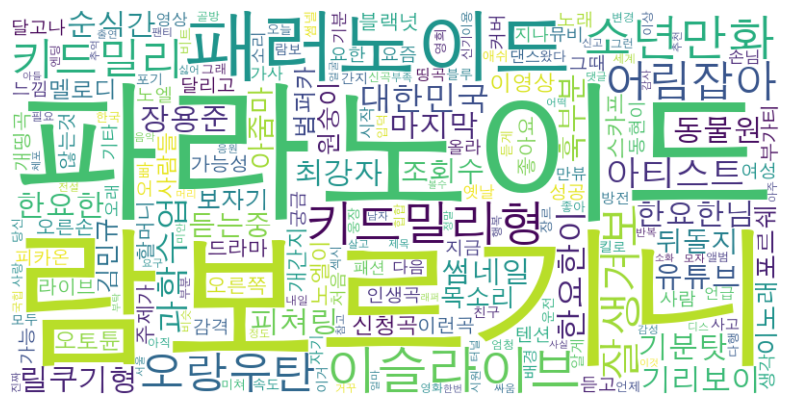

In [123]:
# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path = '/System/Library/Fonts/AppleGothic.ttf', # 애플고딕 폰트 사용(맥북환경에서 한국어 폰트 사용시 필수)
    width = 800, height = 400, background_color ='white').generate(nouns_string)

# 워드 클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [126]:
# 저장
def add_to_csv(df):
    df.to_csv('../data/youtube_comments.csv', mode='a', header=False, index=False)

add_to_csv(df)